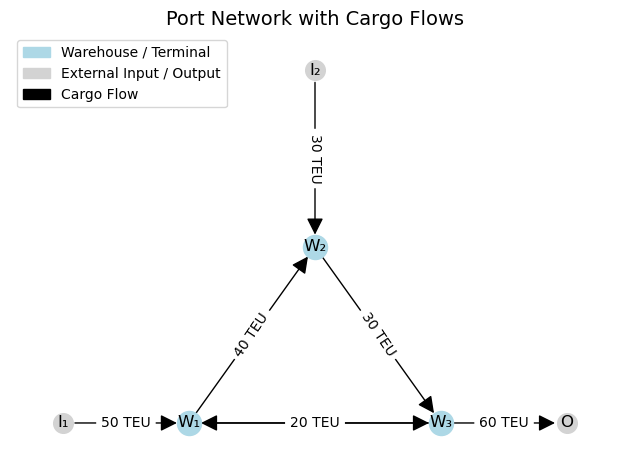

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create directed graph
G = nx.DiGraph()

# Main warehouse nodes
G.add_node("W1", label="W₁", stock=100)
G.add_node("W2", label="W₂", stock=50)
G.add_node("W3", label="W₃", stock=20)

# External inflow sources
G.add_node("Input1", label="I₁")
G.add_node("Input2", label="I₂")

# External outflow sink
G.add_node("Ship", label="O")

# Internal transport routes
G.add_edge("W1", "W2", capacity=40)
G.add_edge("W2", "W3", capacity=30)
G.add_edge("W1", "W3", capacity=20)
G.add_edge("W3", "W1", capacity=20)

# External input and output edges
G.add_edge("Input1", "W1", capacity=50)
G.add_edge("Input2", "W2", capacity=30)
G.add_edge("W3", "Ship", capacity=60)

# Positioning layout
pos = {
    "Input1": (-2, 0),
    "W1": (-1, 0),
    "W2": (0, 1),
    "W3": (1, 0),
    "Input2": (0, 2),
    "Ship": (2, 0)
}

# Draw nodes
main_nodes = ["W1", "W2", "W3"]
external_nodes = ["Input1", "Input2", "Ship"]
nx.draw_networkx_nodes(G, pos, nodelist=main_nodes, node_color="lightblue", node_size=300)
nx.draw_networkx_nodes(G, pos, nodelist=external_nodes, node_color="lightgray", node_size=200)

# Draw labels
labels = nx.get_node_attributes(G, "label")
nx.draw_networkx_labels(G, pos, labels=labels, font_size=12)

# Draw directed edges
nx.draw_networkx_edges(G, pos, edge_color="black", arrows=True, arrowstyle='-|>', arrowsize=25)

# Draw edge labels
edge_labels = {(u, v): f"{d['capacity']} TEU" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Create legend 
legend_elements = [
    mpatches.Patch(color='lightblue', label='Warehouse / Terminal'),
    mpatches.Patch(color='lightgray', label='External Input / Output'),
    mpatches.FancyArrowPatch((0, 0), (0.3, 0), connectionstyle="arc3,rad=0.3",
                             arrowstyle='-|>', mutation_scale=15, color='black', label='Cargo Flow')
]
plt.legend(handles=legend_elements, loc='upper left')

# Final plot settings
plt.title("Port Network with Cargo Flows", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.savefig("port_network.pdf")
plt.show()
